In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from gensim.models.word2vec import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Скачать датасет с фразами Симпсонов
https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data

In [2]:
df = pd.read_csv('drive/MyDrive/simpsons_script_lines.csv')
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


# 2. Обучить word2vec на фразах персонажей

In [3]:
sentences = [word_tokenize(text) for text in tqdm(df['normalized_text']) if type(text) is str]

100%|██████████| 158271/158271 [00:26<00:00, 6073.24it/s] 


In [4]:
model_simpsons = Word2Vec(sentences, workers=1, vector_size=300, min_count=3, window=5, epochs=15)

# 3. Визуализировать embeddings по самым частотным словам (top 1000)

In [5]:
def tsne_plot(model, n_top, embedding_size=300):
    top_tokens = list(model.wv.key_to_index.keys())[:n_top]
    top_embeddings = np.zeros([n_top, embedding_size])

    for i in range(n_top):
        top_embeddings[i] = model.wv[top_tokens[i]]

    tsne = TSNE(n_components=2, init='random', random_state=42)
    z = tsne.fit_transform(top_embeddings)

    plt.figure(figsize=(15, 15))
    plt.scatter(z[:,0], z[:,1])

    for i in range(len(z)):
        plt.annotate(top_tokens[i], (z[i,0], z[i,1] + 0.2))

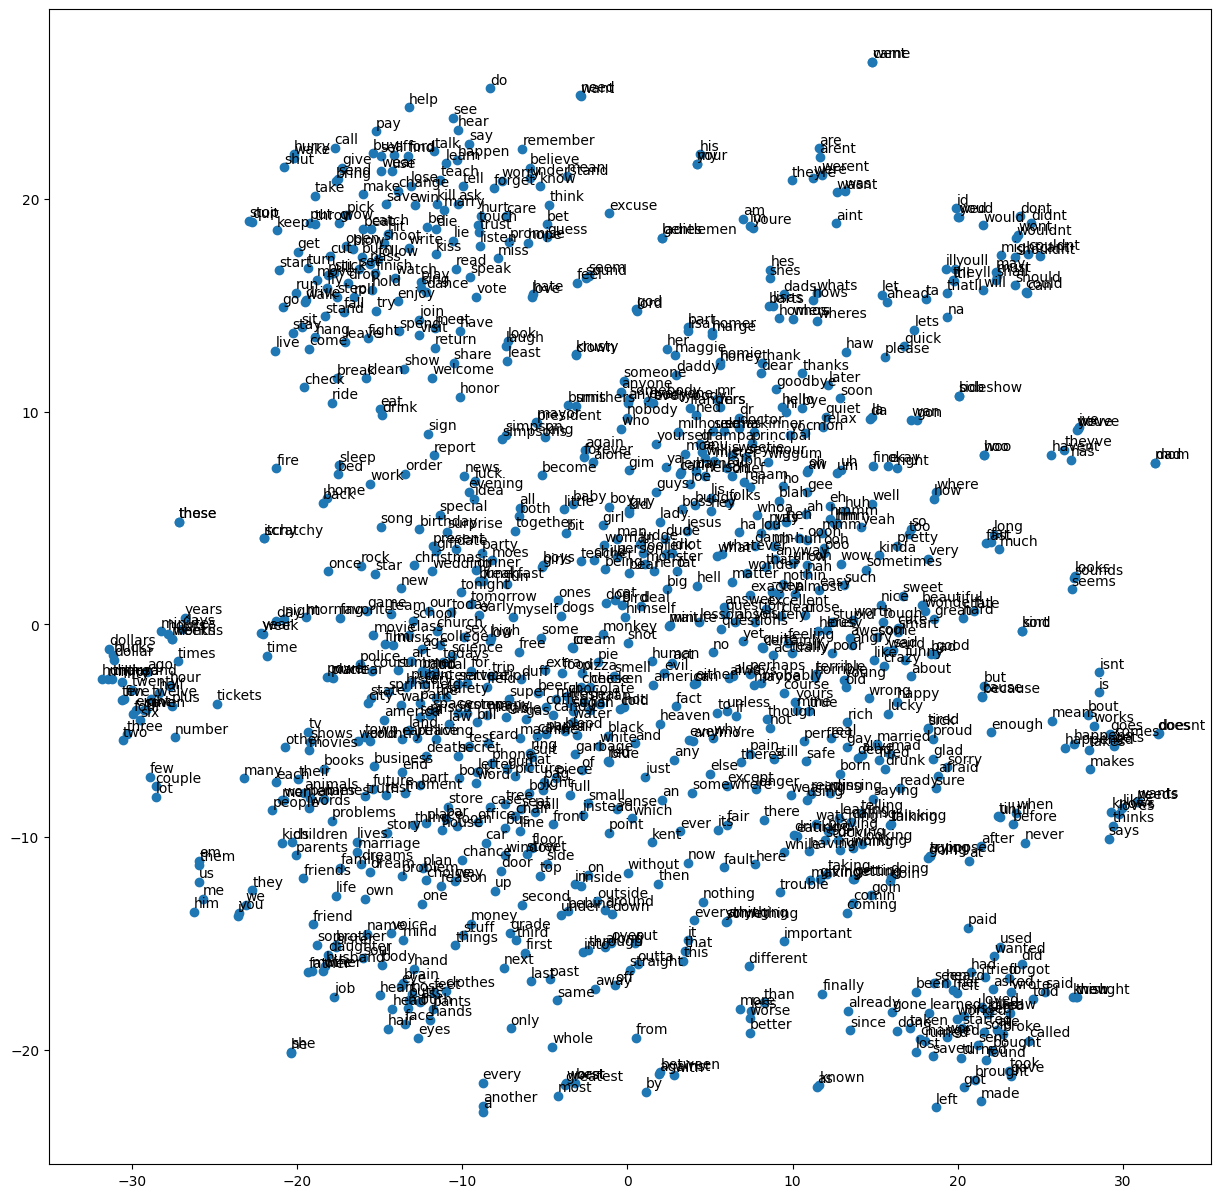

In [6]:
tsne_plot(model=model_simpsons, n_top=1000)

# 4. Найти самые близкие слова для:
 - homer - marge + bart
 - bart - lisa + school
 - marge - homer + home

In [7]:
model_simpsons.wv.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=5)

[('grampa', 0.4864378273487091),
 ('milhouse', 0.45755115151405334),
 ('son', 0.4454876184463501),
 ('lisa', 0.41320258378982544),
 ('dad', 0.40445584058761597)]

In [8]:
model_simpsons.wv.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=5)

[('class', 0.4602125585079193),
 ('church', 0.4597848653793335),
 ('store', 0.4593139886856079),
 ('plant', 0.42138510942459106),
 ('zoo', 0.4113507568836212)]

In [9]:
model_simpsons.wv.most_similar(positive=['marge', 'home'], negative=['homer'], topn=5)

[('back', 0.4780076742172241),
 ('bed', 0.3791434168815613),
 ('bar', 0.3662358224391937),
 ('baby', 0.36216306686401367),
 ('visit', 0.36165904998779297)]